In [3]:
import cx_Oracle
import json
import pandas as pd

user_data = json.load(open('keys.json'))
connection = cx_Oracle.connect(user=user_data['username'], password=user_data['password'],
                                dsn="tarea1_high")

In [79]:
import numpy as np

In [4]:
def send_query(sql):
    df = pd.read_sql(sql, con=connection)
    return df

## Más vendidos

In [13]:
most_sold = send_query("""SELECT id_producto Producto, SUM(monto) MontoVendido
FROM boleta_detalle
GROUP BY id_producto
ORDER BY MontoVendido DESC""")
most_sold.head(10)

,PRODUCTO,MONTOVENDIDO
0,LujoBlanca609024,5728320
1,LujoBlanca607024,4939200
2,LujoBlanca609018,4237920
3,LujoBlanca607020,3628800
4,Kraft609024,3551040
5,Blanca609024,3317760
6,LujoBlanca607018,3160080
7,Negra609024,2643840
8,LujoBlanca506020,2568000
9,Kraft609018,2546640


## 

In [18]:
test = send_query("""Select cliente.nombre, boleta_detalle.monto MontoVendido,boleta.fecha_compra fecha
from boleta_detalle, boleta, cliente
where boleta."id"= boleta_detalle.id_boleta and cliente."id" = boleta.id_cliente
""" #and boleta.fecha_compra between sysdate -1 and sysdate
+"""order by fecha desc""")
test.head(10)

,NOMBRE,MONTOVENDIDO,FECHA
0,Croyorser,2200,2030-10-23
1,Gebaritee,1452,2030-08-26
2,Inmobiliaria Pio V S.A.,1650,2030-07-21
3,Inmobiliaria Pio V S.A.,1650,2030-07-21
4,Inmobiliaria Pio V S.A.,1650,2030-07-21
5,Inmobiliaria Pio V S.A.,1650,2030-07-21
6,Ferrum Aceros Ltda,10800,2030-07-20
7,Quimica Star Chile Ltda.,3920,2030-07-10
8,Quimica Star Chile Ltda.,3920,2030-07-10
9,M Y M Spa,660,2030-07-08


In [52]:
pd.unique(test['FECHA'].dt.year)

array([2030, 2029, 2028, 2027, 2026, 2025, 2024, 2020, 2019, 2018, 2017,
       2016, 2015, 2014], dtype=int64)

<AxesSubplot:>

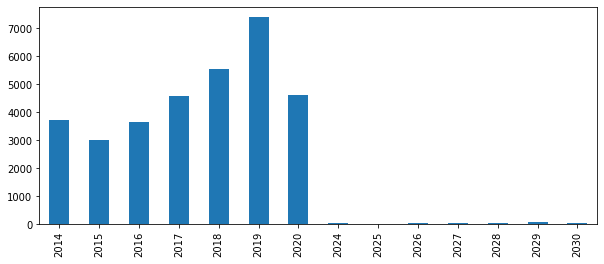

In [100]:
test_ordered = test['FECHA'].dt.year.value_counts().sort_index()
test_ordered.plot(kind="bar", figsize=(10,4))

<AxesSubplot:>

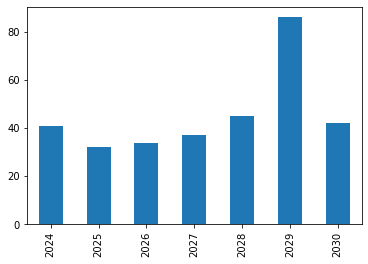

In [75]:
test_ordered[test_ordered < 2021].plot(kind="bar")

<AxesSubplot:>

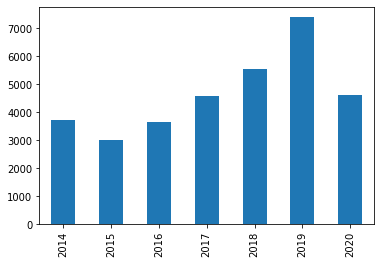

In [74]:
test_ordered[test_ordered > 2021].plot(kind="bar")

In [53]:
wrong_receipts = test[test['FECHA'].dt.year > 2021]
print("Existe un total de " + str(len(wrong_receipts)) + " boletas erróneas (con año 2030) para un total de " + str(len(test)) + " boletas emitidas.")

Existe un total de 317 boletas erróneas (con año 2030) para un total de 32902 boletas emitidas.


In [55]:
wrong_receipts.head()

,NOMBRE,MONTOVENDIDO,FECHA
0,Croyorser,2200,2030-10-23
1,Gebaritee,1452,2030-08-26
2,Inmobiliaria Pio V S.A.,1650,2030-07-21
3,Inmobiliaria Pio V S.A.,1650,2030-07-21
4,Inmobiliaria Pio V S.A.,1650,2030-07-21


In [54]:
wrong_receipts.tail()

,NOMBRE,MONTOVENDIDO,FECHA
312,Vopc,4455,2024-01-11
313,Cardelle,2835,2024-01-02
314,Lubricentro Andes Ltda.,2400,2024-01-02
315,Maxiccello E.I.R.L.,900,2024-01-02
316,Cnc Studio Ltda,2400,2024-01-02


In [41]:
pd.concat([test,test_2030]).drop_duplicates(keep=False)

,NOMBRE,MONTOVENDIDO,FECHA
42,Comercial E Industrial Europer Ltda.,2640,2029-12-28
43,Caneo Y Manzano Ltda.,3600,2029-12-15
44,M Y M Spa,1960,2029-12-13
45,Analisis Y Mediciones Ambientales Ltda,5400,2029-12-03
48,Abastecedora De Combustibles S.A.,10080,2029-11-23
...,...,...,...
32897,Comercial Y Textil Psc S.A.,2835,2014-01-02
32898,Comercial Y Textil Psc S.A.,3850,2014-01-02
32899,Fabal Granja S.A.,4455,2014-01-02
32900,Hunort,720,2014-01-02


In [101]:
boleta_detalle = send_query("SELECT * FROM BOLETA_DETALLE")

,ID_BOLETA,ID_PRODUCTO,CANTIDAD_VENDIDA,MONTO,ESTADO
0,4600,Kraft607020,1,8400,Cumplido
1,4600,LujoBlanca354511,1,3465,Cumplido
2,5400,Blanca354511,1,1733,Cumplido
3,8600,SaquitoKraft203522,1,1540,Cumplido
4,1036,Kraft506018,1,5400,Cumplido
...,...,...,...,...,...
32897,9424,SaquitoKraft304522,15,2970,Pendiente
32898,4187,SaquitoKraft304522,15,2970,Pendiente
32899,8338,Blanca354518,15,2835,Pendiente
32900,2091,Blanca354518,15,2835,Pendiente


In [103]:
cliente = send_query("SELECT * FROM CLIENTE")
cliente

,id,NOMBRE,TELEFONO
0,1,Fukuger,222299
1,2,Vopc,232506
2,3,Sister,221561
3,4,Linentpal,2221809
4,5,Berge,222097
...,...,...,...
231,232,Dipros Limitada,949280500
232,233,Analisis Y Mediciones Ambientales Ltda,949709839
233,234,Julio Jerez Cortes Eirl,979550006
234,235,Inmobiliaria F Y D S A,981014633


In [104]:
comuna = send_query("SELECT * FROM COMUNA")
comuna

,NOMBRE,REGION_ID,id
0,Conchalí,RM,222
1,Lo Espejo,RM,223
2,Renca,RM,224
3,Maipu,RM,1
4,Ovalle,IV,2
5,Chillan,VIII,3
6,Pudahuel,RM,4
7,Rancagua,VI,5
8,Antofagasta,VI,6
9,Puente Alto,RM,7


In [105]:
direccion = send_query("SELECT * FROM DIRECCION")
direccion

,id,ID_COMUNA,DIRECCION
0,221,1,Santa Adela # 9680
1,222,39,Constantino # 166
2,223,222,Ester # 3814
3,224,8,Calle Edison # 4524
4,225,34,Catedral # 2515
...,...,...,...
243,216,19,Vargas Fontecilla 4521
244,217,43,Vicente Zorrilla Nro720
245,218,15,Vicente Zorrilla Nro835
246,219,42,Vicente Zorrilla Nro835


In [108]:
envio = send_query("SELECT * FROM PRODUCTO")
envio

,id,TIPO,STOCK,PRECIO,ALTO,ANCHO,ESPESOR
0,Kraft283511,Kraft,0,1078,28,35,11
1,Kraft283515,Kraft,0,1470,28,35,15
2,Kraft283520,Kraft,0,1960,28,35,20
3,Kraft334011,Kraft,0,1452,33,40,11
4,Kraft334012,Kraft,0,1584,33,40,12
...,...,...,...,...,...,...,...
136,SaquitoKraft305022,SaquitoKraft,0,3300,30,50,22
137,SaquitoKraft354522,SaquitoKraft,0,3465,35,45,22
138,SaquitoKraft355022,SaquitoKraft,0,3850,35,50,22
139,SaquitoKraft405022,SaquitoKraft,0,4400,40,50,22


In [142]:
for i in range(1,13):
    locals()['cumplimiento_{0}'.format(i)] = send_query("""select estado, count(boleta.estado) CANTIDAD
        from boleta
        where EXTRACT(year FROM FECHA_COMPRA) = 2020
        AND EXTRACT(month FROM FECHA_COMPRA) = {}
        group by estado""".format(i))
cumplimiento_1


,ESTADO,CANTIDAD
0,Cumplido,159


,ESTADO,CANTIDAD


True

In [184]:
cumplido = pd.DataFrame(columns=("Mes","Cumplido"))
pendiente = pd.DataFrame(columns=("Mes","Pendiente"))
for i in range(1,12):
    for j in range(len(locals()['cumplimiento_{0}'.format(i)])):
        estado = locals()['cumplimiento_{0}'.format(i)].iloc[j][0] 
        cantidad = locals()['cumplimiento_{0}'.format(i)].iloc[j][1]
        if (estado == "Cumplido"):
            cumplido.loc[i] = [i, cantidad]
        else:
            pendiente.loc[i] = [i, cantidad]
    if (i in cumplido["Mes"]) == False:
        cumplido.loc[i] = [i, 0]
    if (i in pendiente["Mes"]) == False:
        pendiente.loc[i] = [i, 0]

<AxesSubplot:>

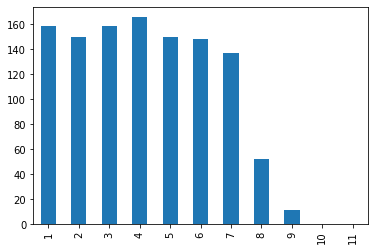

In [188]:
cumplido["Cumplido"].plot(kind="bar")

<AxesSubplot:>

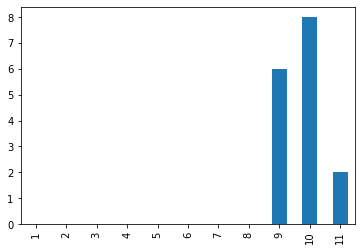

In [189]:
pendiente["Pendiente"].plot(kind="bar")

<AxesSubplot:xlabel='Mes'>

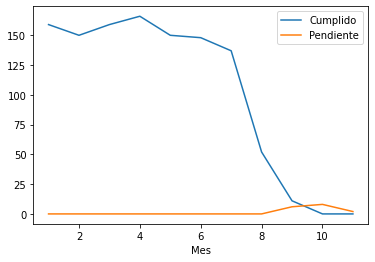

In [190]:
ax = cumplido.plot(x='Mes', y = 'Cumplido', kind = 'line')
pendiente.plot(x='Mes', y = 'Pendiente', kind = 'line', ax=ax)

<bound method DataFrame.iterrows of    Mes Pendiente
1    1         0
2    2         0
3    3         0
4    4         0
5    5         0
6    6         0
7    7         0
8    8         0
9    9         6
10  10         8
11  11         2>

<AxesSubplot:xlabel='Mes'>

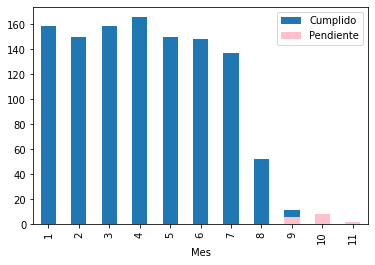

In [193]:
ax = cumplido.plot(x='Mes', y = 'Cumplido', kind = 'bar')
pendiente.plot(x='Mes', y = 'Pendiente', kind = 'bar', color="pink", ax=ax)

In [214]:
cumplimiento = pd.DataFrame(columns=("Mes","Porcentaje de cumplimiento"))
for i in range(1,12):
    cumplimiento.loc[i] = (cumplido.loc[i][1]/(cumplido.loc[i][1] + pendiente.loc[i][1]))*100

<AxesSubplot:>

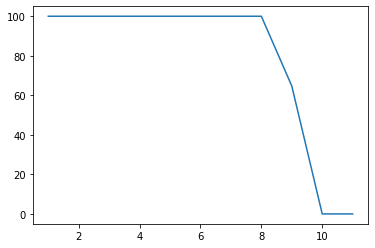

In [216]:
cumplimiento["Porcentaje de cumplimiento"].plot(kind="line")